In [2]:
print('a')

a


In [3]:
import HelmetRegionChecker
import tensorflow as tf
import numpy as np

c:\Users\th070\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pytorch 1.13.1+cpu
torchvision 0.14.1+cpu


In [4]:
HeadImages = HelmetRegionChecker.GetHelmetImages(r'E:\GithubProjects\KagglePractice\HelmetDetection\TestImage\test.jpg')

c:\Users\th070\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\th070\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\th070\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to pa

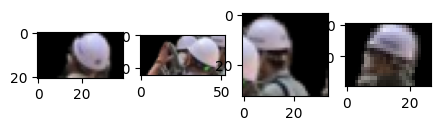

In [5]:
HelmetRegionChecker.ShowHelmetImages(HeadImages)

In [6]:
from keras.models import load_model
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
import copy

In [7]:
model = load_model(r'E:\GithubProjects\KagglePractice\HelmetDetection\models\HelmetDetectionModel.h5')

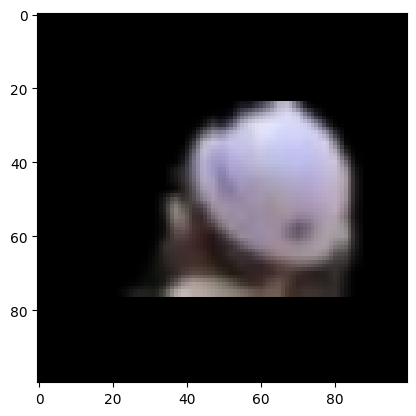

In [8]:
# plt.imshow(cv.resize(HeadImages[0][0], (100, 100)))
TargetImage = np.zeros((100, 100,3))
ConvertedImage = copy.deepcopy(HeadImages[0][0])
Height, Width = ConvertedImage.shape[:2]
if Width > Height:
	# Width : Height = 100 : ?
	# ? = 100*Height/Width
	ConvertedImage = cv.resize(ConvertedImage, (100, int(100 * Height / Width)))
else:
	# Width : Height = ? : 100
	# ? = 100 * Width / Height
	ConvertedImage = cv.resize(ConvertedImage, (int(100 * Width / Height), 100))
Height, Width = ConvertedImage.shape[:2]

if Width > Height:
	x0,y0 = 0, 50 - int(Height/2)
	x1,y1 = Width, 50 + int(Height/2) + 1
else:
	x0,y0 = 50 - int(Width / 2), 0
	x1,y1 = 50 + int(Width / 2) + 1, Height

TargetImage[y0:y1,x0:x1] = ConvertedImage[:,:]
TargetImage = TargetImage.astype('int16')
plt.imshow(TargetImage)

In [9]:
model.predict(np.array([TargetImage]))

1/1 [==============================] - 0s 390ms/step


array([[1.]], dtype=float32)

Final

In [1]:
import HelmetRegionChecker
import tensorflow as tf
import numpy as np

from keras.models import load_model
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
import copy
import matplotlib.patches as patches

c:\Users\th070\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pytorch 1.13.1+cpu
torchvision 0.14.1+cpu


In [7]:
ImagePos = r'E:\GithubProjects\KagglePractice\HelmetDetection\TestImage\test.jpg'
# ImagePos = r'E:\GithubProjects\KagglePractice\FaceDetection\TestImage\02.jpg'
HeadImages = HelmetRegionChecker.GetHelmetImages(ImagePos)

In [6]:
# model = load_model(r'E:\GithubProjects\KagglePractice\HelmetDetection\models\HelmetDetectionModel.h5')
model = load_model(r'E:\GithubProjects\KagglePractice\HelmetDetection\models\HelmetDetectionModel_NotClear.h5')

In [8]:
def GetPredictedData(HeadImage):
	# plt.imshow(cv.resize(HeadImages[0][0], (100, 100)))
	TargetImage = np.zeros((100, 100,3))
	ConvertedImage = copy.deepcopy(HeadImage)
	Height, Width = ConvertedImage.shape[:2]
	if Width > Height:
		# Width : Height = 100 : ?
		# ? = 100*Height/Width
		ConvertedImage = cv.resize(ConvertedImage, (100, int(100 * Height / Width)))
	else:
		# Width : Height = ? : 100
		# ? = 100 * Width / Height
		ConvertedImage = cv.resize(ConvertedImage, (int(100 * Width / Height), 100))
	Height, Width = ConvertedImage.shape[:2]

	if Width > Height:
		x0,y0 = 0, 50 - int(Height/2)
		x1,y1 = Width, 50 + int(Height/2) + 1
	else:
		x0,y0 = 50 - int(Width / 2), 0
		x1,y1 = 50 + int(Width / 2) + 1, Height
	try:
		TargetImage[y0:y1,x0:x1] = ConvertedImage[:,:]
	except:
		try:
			TargetImage[y0:y1-1,x0:x1] = ConvertedImage[:,:]
		except:
			try:
				TargetImage[y0:y1,x0:x1-1] = ConvertedImage[:,:]
			except:
				pass
	TargetImage = TargetImage.astype('int16')
	return model.predict(np.array([TargetImage]))

1/1 [==============================] - 0s 29ms/step
[[1.]]
1/1 [==============================] - 0s 29ms/step
[[1.]]
1/1 [==============================] - 0s 30ms/step
[[1.]]
1/1 [==============================] - 0s 38ms/step
[[1.]]


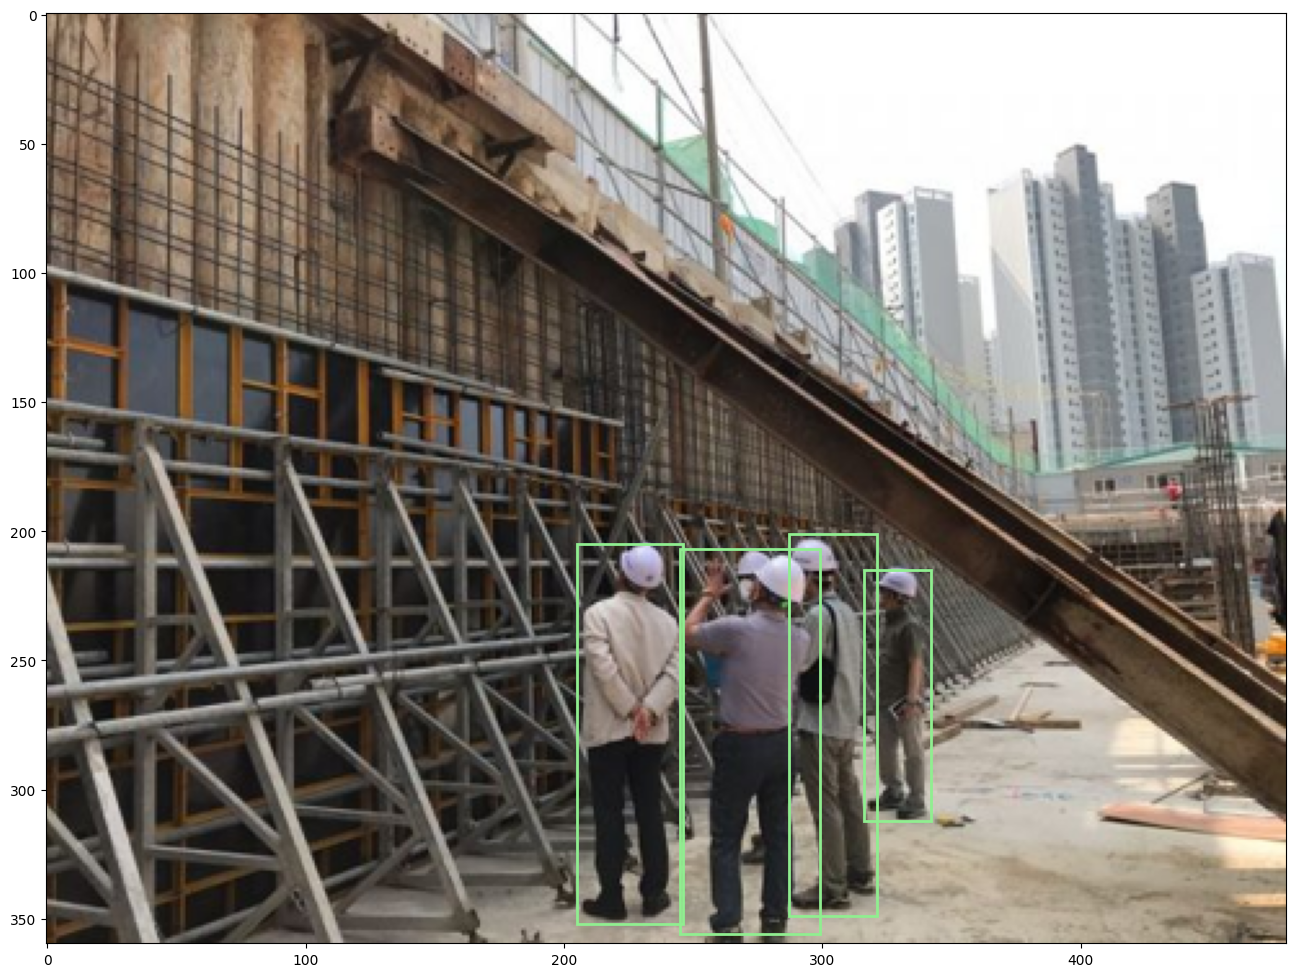

In [10]:
fig, ax = plt.subplots(1, figsize=(16, 16))
Img = Image.open(ImagePos)
Img = Img.resize((480, 360))
plt.imshow(Img)
for i, Data in enumerate(HeadImages):
	Percent = GetPredictedData(Data[0])
	print(Percent)
	# print(Data[3])
	# print(Data[1], Data[2])
	LeftTop, RightBottom = (int(Data[3][0]),int(Data[3][1])), (int(Data[3][2]),int(Data[3][3]))
	Color = "lightgreen" if float(Percent[0][0]) > 0.5 else "red"
	
	rect = patches.Rectangle(LeftTop, RightBottom[0]-LeftTop[0], RightBottom[1]-LeftTop[1], linewidth=2, edgecolor=Color, facecolor='none')
	ax.add_patch(rect)

In [11]:
def GetPredictedData(HeadImage):
	# plt.imshow(cv.resize(HeadImages[0][0], (100, 100)))
	TargetImage = np.zeros((100, 100,3))
	ConvertedImage = copy.deepcopy(HeadImage)
	Height, Width = ConvertedImage.shape[:2]
	if Width > Height:
		# Width : Height = 100 : ?
		# ? = 100*Height/Width
		ConvertedImage = cv.resize(ConvertedImage, (100, int(100 * Height / Width)))
	else:
		# Width : Height = ? : 100
		# ? = 100 * Width / Height
		ConvertedImage = cv.resize(ConvertedImage, (int(100 * Width / Height), 100))
	Height, Width = ConvertedImage.shape[:2]

	if Width > Height:
		x0,y0 = 0, 50 - int(Height/2)
		x1,y1 = Width, 50 + int(Height/2) + 1
	else:
		x0,y0 = 50 - int(Width / 2), 0
		x1,y1 = 50 + int(Width / 2) + 1, Height
	try:
		TargetImage[y0:y1,x0:x1] = ConvertedImage[:,:]
	except:
		try:
			TargetImage[y0:y1-1,x0:x1] = ConvertedImage[:,:]
		except:
			try:
				TargetImage[y0:y1,x0:x1-1] = ConvertedImage[:,:]
			except:
				pass
	TargetImage = TargetImage.astype('int16')
	return model.predict(np.array([TargetImage]))

def ShowPredictImage(ImagePos):
	HeadImages = HelmetRegionChecker.GetHelmetImages(ImagePos)
	model = load_model(r'E:\GithubProjects\KagglePractice\HelmetDetection\models\HelmetDetectionModel_NotClear.h5')

	fig, ax = plt.subplots(1, figsize=(16, 16))
	Img = Image.open(ImagePos)
	Img = Img.resize((480, 360))
	plt.imshow(Img)
	for i, Data in enumerate(HeadImages):
		Percent = GetPredictedData(Data[0])
		print(Percent)
		# print(Data[3])
		# print(Data[1], Data[2])
		LeftTop, RightBottom = (int(Data[3][0]),int(Data[3][1])), (int(Data[3][2]),int(Data[3][3]))
		Color = "lightgreen" if float(Percent[0][0]) > 0.5 else "red"
		
		rect = patches.Rectangle(LeftTop, RightBottom[0]-LeftTop[0], RightBottom[1]-LeftTop[1], linewidth=2, edgecolor=Color, facecolor='none')
		ax.add_patch(rect)

1/1 [==============================] - 0s 31ms/step
[[1.]]
1/1 [==============================] - 0s 28ms/step
[[1.]]
1/1 [==============================] - 0s 26ms/step
[[1.]]
1/1 [==============================] - 0s 37ms/step
[[1.]]
1/1 [==============================] - 0s 32ms/step
[[1.]]
1/1 [==============================] - 0s 60ms/step
[[1.]]
1/1 [==============================] - 0s 31ms/step
[[1.]]


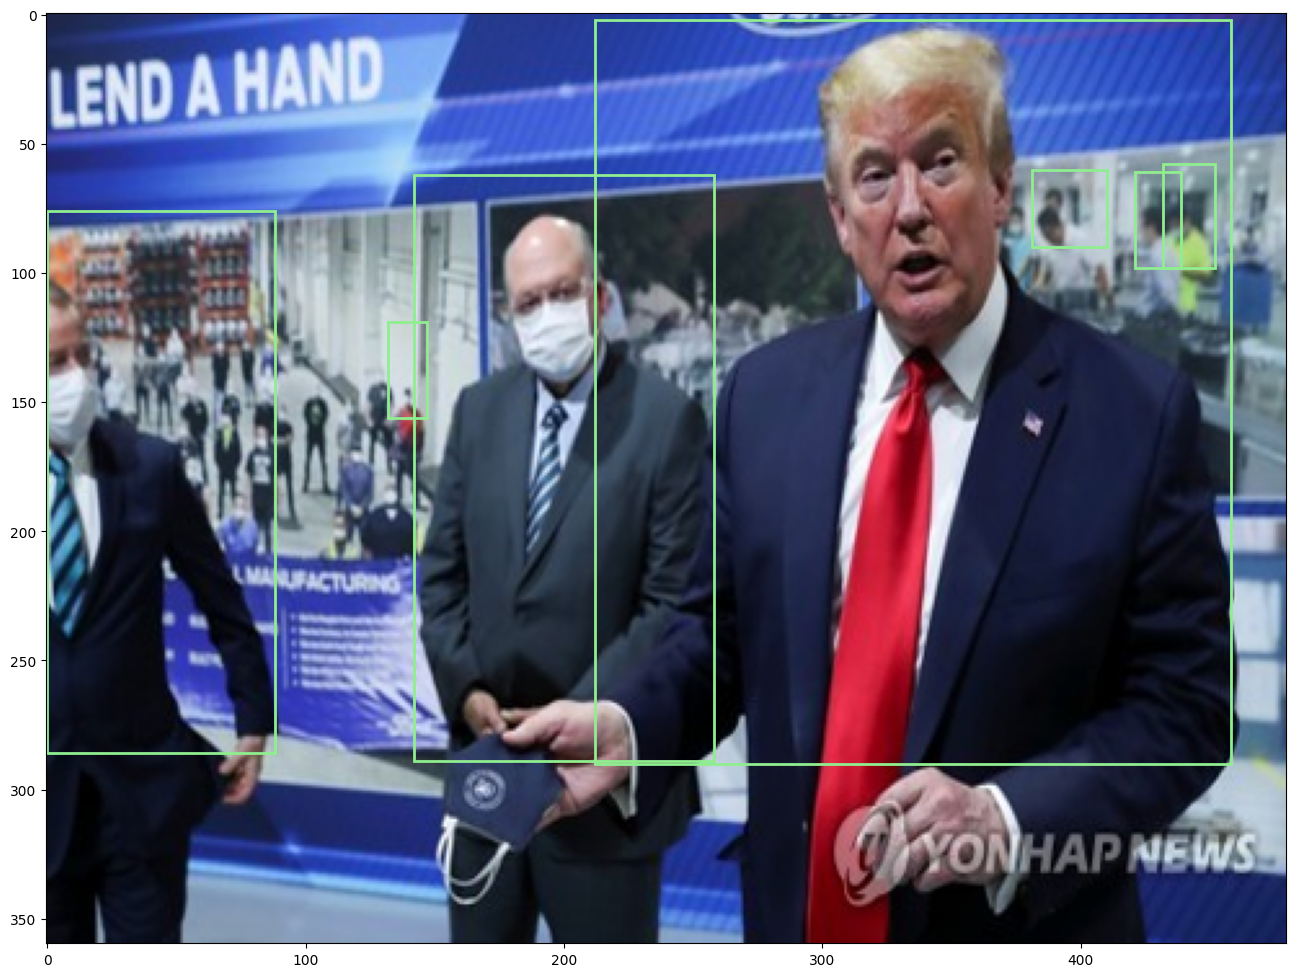

In [13]:
ShowPredictImage(r'E:\GithubProjects\KagglePractice\FaceDetection\TestImage\02.jpg')

1/1 [==============================] - 0s 26ms/step
[[1.]]
1/1 [==============================] - 0s 28ms/step
[[1.]]
1/1 [==============================] - 0s 31ms/step
[[1.]]
1/1 [==============================] - 0s 31ms/step
[[1.]]


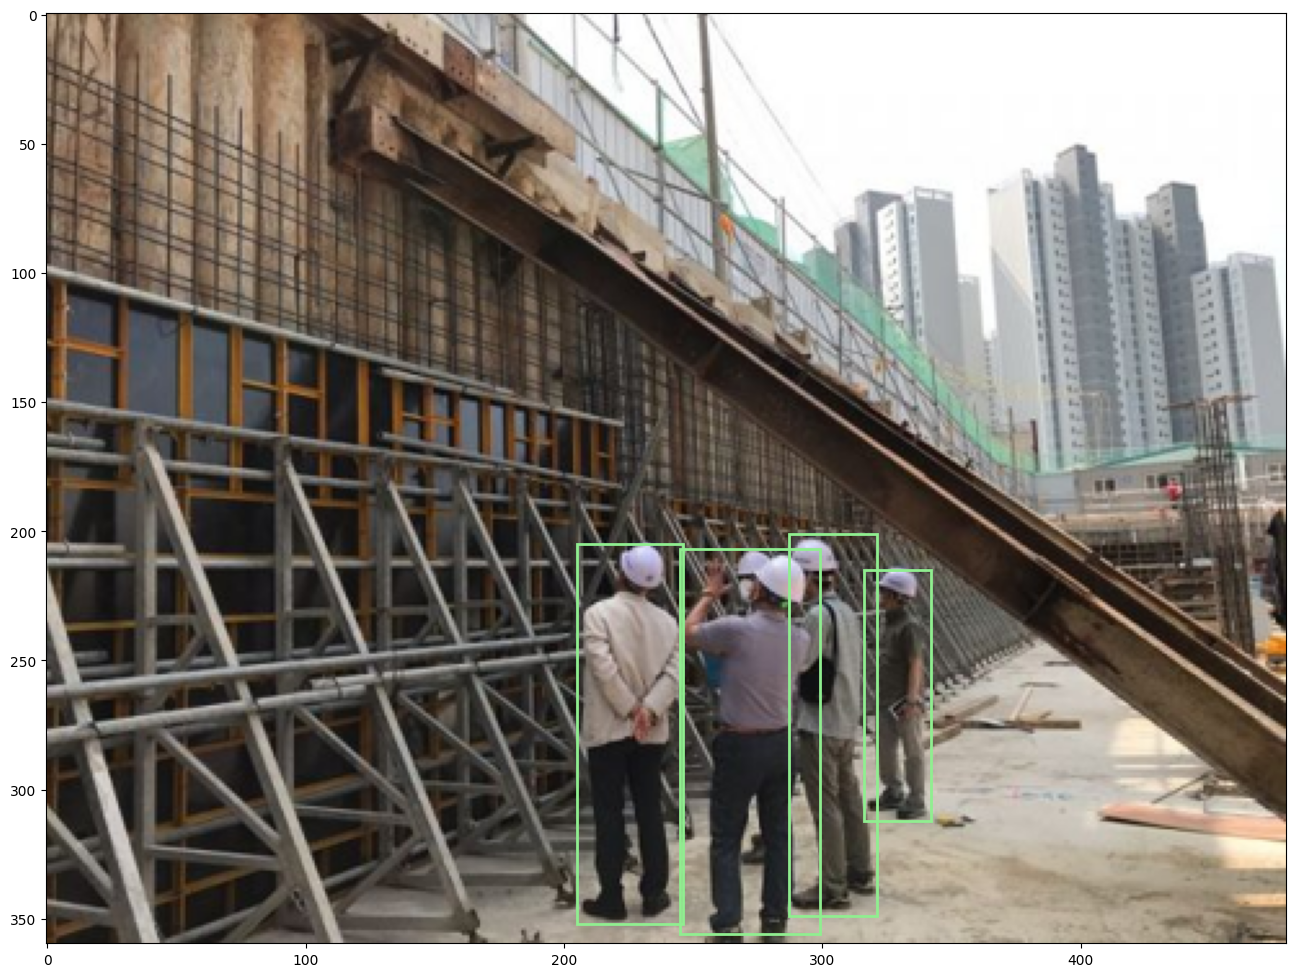

In [14]:
ShowPredictImage(r'E:\GithubProjects\KagglePractice\HelmetDetection\TestImage\test.jpg')

좋지 않은 예측이다.. 데이터 셋을 변경하거나 재 학습을 시켜봐야겠다.